<a href="https://colab.research.google.com/github/shanta-2000/Diabetes-prediction-using-SVM-and-DT/blob/main/SVM%26DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report

In [ ]:
#load data

df = pd.read_csv("/content/drive/MyDrive/CSE475/LAB3/diabetes_dataset.csv")

print(df)

      Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference  HipCircumference   WHR  \
0       

In [ ]:
df.head(5)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [ ]:
df.tail(5)

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
9533,32,3,23.00,102.3,62.0,4.1,109.3,47.8,76.7,86.8,115.0,0.75,0,0,0,0,0
9534,74,0,24.29,125.8,93.0,5.3,95.8,66.6,103.7,90.1,94.3,0.96,1,0,0,1,1
9535,75,6,26.10,107.6,75.0,5.0,168.5,62.3,149.8,84.0,114.9,0.73,0,0,0,1,0
9536,52,1,25.88,99.3,96.0,4.6,70.0,48.4,122.9,97.5,88.7,1.10,1,0,0,0,1
9537,33,3,25.61,69.1,65.0,4.0,69.0,59.4,169.5,79.7,101.1,0.79,0,1,0,0,0


In [ ]:
df.isnull().sum()

,0
Age,0
Pregnancies,0
BMI,0
Glucose,0
BloodPressure,0
HbA1c,0
LDL,0
HDL,0
Triglycerides,0
WaistCircumference,0


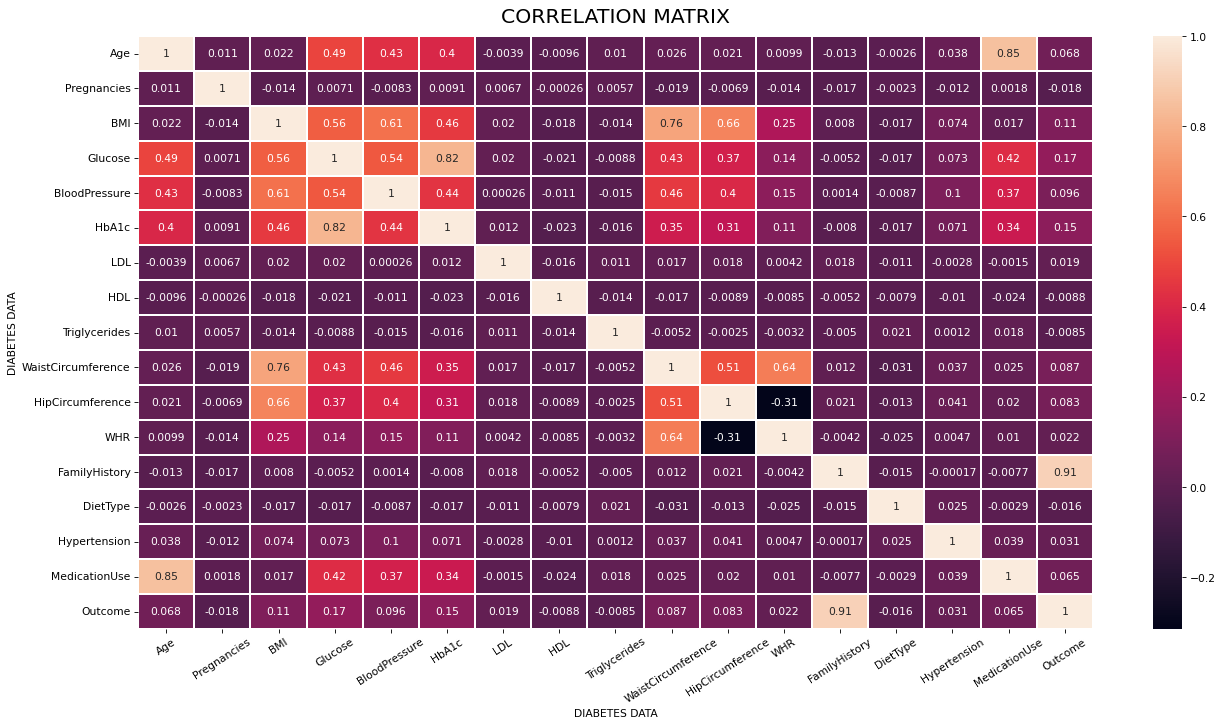

In [ ]:
correlation = df.corr()

plt.figure(figsize=(20,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('DIABETES DATA')
plt.ylabel('DIABETES DATA')
plt.xticks(rotation=33)
plt.show()

SVM MODEL


In [ ]:
X=df.drop(columns=['Outcome'])
Y=df['Outcome']
print(X)
print(Y)

      Age  Pregnancies    BMI  Glucose  BloodPressure  HbA1c    LDL   HDL  \
0      69            5  28.39    130.1           77.0    5.4  130.4  44.0   
1      32            1  26.49    116.5           72.0    4.5   87.4  54.2   
2      89           13  25.34    101.0           82.0    4.9  112.5  56.8   
3      78           13  29.91    146.0          104.0    5.7   50.7  39.1   
4      38            8  24.56    103.2           74.0    4.7  102.5  29.1   
...   ...          ...    ...      ...            ...    ...    ...   ...   
9533   32            3  23.00    102.3           62.0    4.1  109.3  47.8   
9534   74            0  24.29    125.8           93.0    5.3   95.8  66.6   
9535   75            6  26.10    107.6           75.0    5.0  168.5  62.3   
9536   52            1  25.88     99.3           96.0    4.6   70.0  48.4   
9537   33            3  25.61     69.1           65.0    4.0   69.0  59.4   

      Triglycerides  WaistCircumference  HipCircumference   WHR  \
0       

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[0 1 0 ... 0 1 0]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9926624737945493
Precision: 0.998389694041868
Recall (Sensitivity): 0.9794628751974723
F1-Score: 0.988835725677831


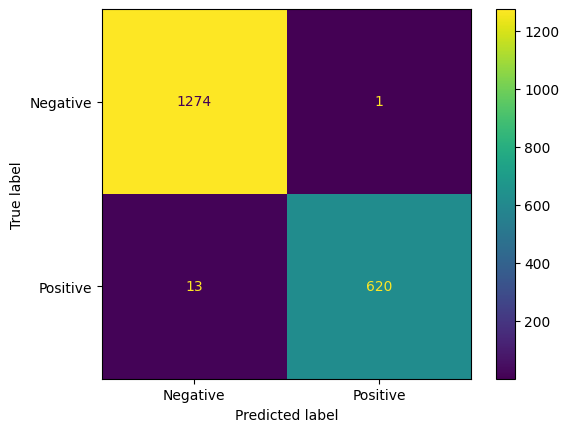

In [ ]:
#confuison matrix
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()

DECISION TREE

In [ ]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X,Y)

[Text(0.6, 0.8333333333333334, 'FamilyHistory <= 0.5\ngini = 0.451\nsamples = 9538\nvalue = [6256.0, 3282.0]'),
 Text(0.4, 0.5, 'Glucose <= 140.05\ngini = 0.112\nsamples = 6653\nvalue = [6256, 397]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 6256\nvalue = [6256, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 397\nvalue = [0, 397]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2885\nvalue = [0, 2885]'),
 Text(0.7, 0.6666666666666667, '  False')]

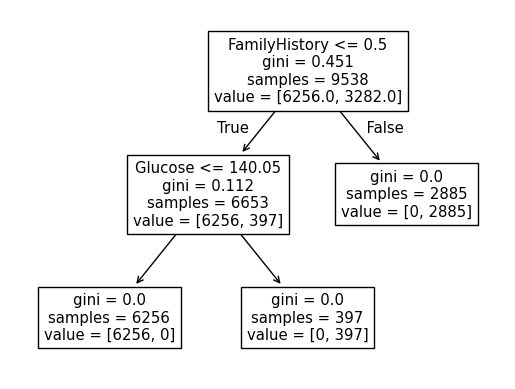

In [ ]:
features = ['Age','Pregnancies','BMI','Glucose','BloodPressure','HbA1c','LDL','HDL','Triglycerides','WaistCircumference','HipCircumference','WHR','FamilyHistory','DietType','Hypertension','MedicationUse']
tree.plot_tree(dtree, feature_names=features)

In [ ]:
print(dtree.predict([[40, 2, 28, 130,90,4.8,112.5,56.8,91.1,102.7,1.3,0,1,0,1,1]]))

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
